In [2]:
%matplotlib inline

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Data Tidying and Cleaning
## Live demos

In [4]:
pew = pd.read_csv('data/pew.csv')

In [5]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [13]:
pew_tidy = pew.melt(
    id_vars=["religion"], # Identifier variables (all other are "unpivoted"
    var_name= "income", # Variable
value_name = "frequency") #value

In [14]:
pew_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [17]:
pew_tidy[pew_tidy.frequency == 0]

,religion,income,frequency


In [61]:
tb = pd.read_csv('data/tb.csv') # tb = pd.read_csv('data/tb.csv', na_values = ["?",-999, "NA"]

In [62]:
tb.head

<bound method NDFrame.head of      iso2  year  m04   m514   m014  m1524   m2534   m3544   m4554  m5564  ...  \
0      AD  1989  NaN    NaN    NaN    NaN     NaN     NaN     NaN    NaN  ...   
1      AD  1990  NaN    NaN    NaN    NaN     NaN     NaN     NaN    NaN  ...   
2      AD  1991  NaN    NaN    NaN    NaN     NaN     NaN     NaN    NaN  ...   
3      AD  1992  NaN    NaN    NaN    NaN     NaN     NaN     NaN    NaN  ...   
4      AD  1993  NaN    NaN    NaN    NaN     NaN     NaN     NaN    NaN  ...   
...   ...   ...  ...    ...    ...    ...     ...     ...     ...    ...  ...   
5764   ZW  2004  NaN    NaN  187.0  833.0  2908.0  2298.0  1056.0  366.0  ...   
5765   ZW  2005  NaN    NaN  210.0  837.0  2264.0  1855.0   762.0  295.0  ...   
5766   ZW  2006  NaN    NaN  215.0  736.0  2391.0  1939.0   896.0  348.0  ...   
5767   ZW  2007  6.0  132.0  138.0  500.0  3693.0     0.0   716.0  292.0  ...   
5768   ZW  2008  NaN    NaN  127.0  614.0     0.0  3316.0   704.0  263.0  ...  

In [63]:
tb.shape

(5769, 22)

In [65]:
# Check if any value in iso2 column is NaN
tb.iso2.isna().any()

True

In [66]:
# Visualize the rows with NaN as value for column iso2
tb[tb.iso2.isna()]

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
3691,NaN,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3692,NaN,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3693,NaN,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3694,NaN,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3695,NaN,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3696,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3697,NaN,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3698,NaN,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3699,NaN,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3700,NaN,1995,NaN,NaN,0.0,68.0,235.0,113.0,55.0,21.0,...,NaN,NaN,5.0,49.0,78.0,50.0,16.0,1.0,0.0,NaN


In [67]:
# using loc[index, column] we take every row in iso2 column that value is NaN to become "NA"
tb.loc[tb.iso2.isna(), "iso2"] = "NA"

In [68]:
# Again check if we still have NaN value in iso2 column
tb[tb.iso2.isna()]

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu


In [69]:
# check types of the columns
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [70]:
# Because count is not equal in every row that means there is a lot of missing records
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


In [52]:
tb.head()

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# check names of columns
tb.columns

Index(['iso2', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [73]:
# we melt data to keep iso2 and year as attributes and makes every other column as measured variables 
tb_tidy = tb.melt(id_vars=["iso2", "year"],var_name="sex_and_age",value_name="cases")

In [74]:
tb_tidy

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [77]:
# delete all rows where there is NaN as valueabs 
tb_tidy = tb_tidy.dropna()
# 115380 rows

In [79]:
tb_tidy
# 35750 rows 

,iso2,year,sex_and_age,cases
15,AD,2005,m04,0.0
16,AD,2006,m04,0.0
18,AD,2008,m04,0.0
42,AE,2006,m04,0.0
43,AE,2007,m04,0.0
...,...,...,...,...
115195,VU,2008,fu,0.0
115269,YE,2008,fu,0.0
115323,ZA,2008,fu,0.0
115350,ZM,2008,fu,0.0


In [85]:
# slice is like slicing in python
tb_tidy.sex_and_age.str.slice(0,1) # == tb_tidy.sex_and_age.str.get(0)

15        m
16        m
18        m
42        m
43        m
         ..
115195    f
115269    f
115323    f
115350    f
115379    f
Name: sex_and_age, Length: 35750, dtype: object

In [89]:
# we can put it like new columns
tb_tidy["sex"] = tb_tidy.sex_and_age.str.get(0)
tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1)

In [90]:
tb_tidy

,iso2,year,sex_and_age,cases,sex,age_group
15,AD,2005,m04,0.0,m,04
16,AD,2006,m04,0.0,m,04
18,AD,2008,m04,0.0,m,04
42,AE,2006,m04,0.0,m,04
43,AE,2007,m04,0.0,m,04
...,...,...,...,...,...,...
115195,VU,2008,fu,0.0,f,u
115269,YE,2008,fu,0.0,f,u
115323,ZA,2008,fu,0.0,f,u
115350,ZM,2008,fu,0.0,f,u


In [92]:
# That means old column sex_and_age is unnecessary and we can drop it
tb_tidy = tb_tidy.drop(columns=["sex_and_age"])

In [93]:
tb_tidy

,iso2,year,cases,sex,age_group
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


In [97]:
# making function to change some denotes in table
def process_age_group(age_group):
    ages = {"04": "0-4", "65": "65+", "u": "unknown"}
    if age_group in ages:
        return ages[age_group]
    else:
        return f"{age_group[:-2]}--{age_group[-2:]}"

In [98]:
# use function to change values in column age_group
tb_tidy.age_group = tb_tidy.age_group.apply(process_age_group)

In [106]:
# tidy up the column and row order 
tb_tidy = tb_tidy[["iso2", "year", "sex", "age_group", "cases"]]
tb_tidy = tb_tidy.sort_values(["iso2", "year"])

In [107]:
tb_tidy

,iso2,year,sex,age_group,cases
11544,AD,1996,m,0--14,0.0
17313,AD,1996,m,15--24,0.0
23082,AD,1996,m,25--34,0.0
28851,AD,1996,m,35--44,4.0
34620,AD,1996,m,45--54,1.0
...,...,...,...,...,...
92303,ZW,2008,f,35--44,2890.0
98072,ZW,2008,f,45--54,467.0
103841,ZW,2008,f,55--64,174.0
109610,ZW,2008,f,65+,105.0


In [165]:
weather_data = pd.read_csv('data/weather.csv')

In [166]:
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [167]:
# check all values for this elemnt column
weather_data.element.unique()

array(['tmax', 'tmin'], dtype=object)

In [168]:
#melt columns to transform day from column to row
weather_data = weather_data.melt(id_vars=["id", "year", "month", "element"], var_name="day", value_name="value")

In [169]:
# check day unique values
weather_data.day.unique()

array(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29',
       'd30', 'd31'], dtype=object)

In [170]:
# transform day column from string to int 
weather_data.day = weather_data.day.str.slice(1).astype(int)

In [171]:
# tmin and tmax we want to make it as columns
weather_data = weather_data.pivot_table(index=["id", "year", "month", "day" ], columns=["element"], values="value")

In [172]:
weather_data = weather_data.reset_index()

In [178]:
# reorder columns with list 
weather_data[["id","tmin", "tmax", "day", "month", "year"]]

element,id,tmin,tmax,day,month,year
0,MX17004,14.5,27.8,30,1,2010
1,MX17004,14.4,27.3,2,2,2010
2,MX17004,14.4,24.1,3,2,2010
3,MX17004,13.4,29.7,11,2,2010
4,MX17004,10.7,29.9,23,2,2010
5,MX17004,14.2,32.1,5,3,2010
6,MX17004,16.8,34.5,10,3,2010
7,MX17004,17.6,31.1,16,3,2010
8,MX17004,16.7,36.3,27,4,2010
9,MX17004,18.2,33.2,27,5,2010


In [179]:
weather_data.day

0     30
1      2
2      3
3     11
4     23
5      5
6     10
7     16
8     27
9     27
10    17
11    29
12     3
13    14
14    23
15     5
16    29
17     8
18    13
19    25
20    31
21     5
22    14
23     7
24    15
25    28
26     2
27     5
28    27
29     4
30    26
31     1
32     6
Name: day, dtype: int64

In [184]:
weather_data["day"] # it returns pandas.Series
type(weather_data["day"]) # 1 column

pandas.core.series.Series

In [185]:
weather_data[["day", "month"]] # it returns pandas.DataFrame
type(weather_data[["day"]]) # table with 1 column

pandas.core.frame.DataFrame

In [188]:
weather_data["date"] = pd.to_datetime(weather_data[["year", "month", "day"]])

In [191]:
weather_data = weather_data.drop(columns=["year", "month", "day"])

In [194]:
weather_data = weather_data[["date", "tmin", "tmax"]]

In [196]:
weather_data.to_csv('data/weather_tidy.csv', index=None)

### Bilboard  - United and Divide tables

In [228]:
billboard = pd.read_csv('data/billboard.csv')

In [229]:
billboard[billboard.wk65.notna()]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
# rename a column
billboard = billboard.rename(columns={"date.entered": "date_entered"}) 

In [232]:
billboard_tidy = billboard.melt(
    id_vars=["year", "artist", "track", "time", "date_entered"],
    var_name="week", 
    value_name="position" )

In [233]:
# check if every one value of column week start with "wk"
billboard_tidy.week.str.startswith("wk").all()

True

In [234]:
# transform it into int 
billboard_tidy.week = billboard_tidy.week.str.slice(2).astype(int)

In [243]:
billboard_tidy.dtypes

year              int64
artist           object
track            object
time             object
date_entered     object
week              int64
position        float64
dtype: object

In [239]:
billboard_tidy

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,76,NaN


In [241]:
# drop all NaN  
billboard_tidy = billboard_tidy.dropna()

In [242]:
billboard_tidy

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50.0


In [245]:
# every songs has attribute year=2000 that means we can remove this column
billboard_tidy.year.unique()

array([2000])

In [246]:
# check songs that are in 10 week
billboard_tidy[billboard_tidy.week==10]

,year,artist,track,time,date_entered,week,position
2855,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,10,51.0
2856,2000,3 Doors Down,Loser,4:24,2000-10-21,10,61.0
2857,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,10,57.0
2858,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,10,6.0
2860,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,10,36.0
...,...,...,...,...,...,...,...
3162,2000,"Wills, Mark",Back At One,4:00,2000-01-15,10,46.0
3163,2000,"Worley, Darryl",When You Need My Lov...,3:35,2000-06-17,10,80.0
3164,2000,"Wright, Chely",It Was,3:51,2000-03-04,10,98.0
3167,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,10,89.0


In [249]:
# we take whole history of specific song
billboard_tidy[(billboard_tidy.artist=="3 Doors Down") & (billboard_tidy.track=="Kryptonite")]

,year,artist,track,time,date_entered,week,position
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
319,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,2,70.0
636,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,3,68.0
953,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,4,67.0
1270,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,5,66.0
1587,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,6,57.0
1904,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,7,54.0
2221,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,8,53.0
2538,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,9,51.0
2855,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,10,51.0


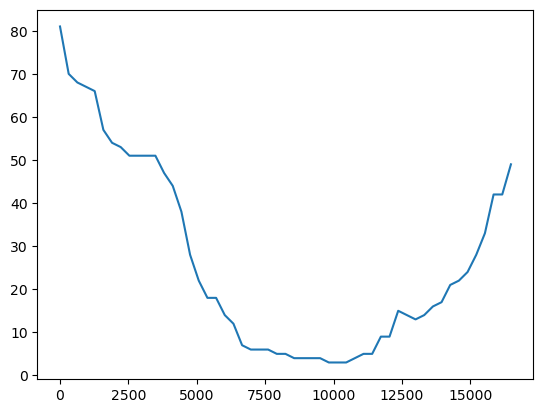

In [317]:
# we can also plot it 
plt.plot(billboard_tidy[(billboard_tidy.artist=="3 Doors Down") & (billboard_tidy.track=="Kryptonite")].position)

In [323]:
# we can separate dataset into  2 divided dataset: either is for songs, either is for positions
songs = billboard_tidy[["track", "artist", "time"]].drop_duplicates(ignore_index=True) #==.reset_index(drop=True)

In [322]:
songs

,track,artist,time
0,Baby Don't Cry (Keep...,2 Pac,4:22
1,The Hardest Part Of ...,2Ge+her,3:15
2,Kryptonite,3 Doors Down,3:53
3,Loser,3 Doors Down,4:24
4,Wobble Wobble,504 Boyz,3:35
...,...,...,...
312,Another Nine Minutes,Yankee Grey,3:10
313,Real Live Woman,"Yearwood, Trisha",3:55
314,Whistle While You Tw...,Ying Yang Twins,4:19
315,Kernkraft 400,Zombie Nation,3:30


In [303]:
# songs['id'] = songs.index + 1

In [309]:
# songs=songs[['track', 'artist', 'time']]

In [324]:
# making second table
song_info = billboard_tidy[["date_entered", "week", "position"]].drop_duplicates().reset_index(drop=True)

In [325]:
song_info

,date_entered,week,position
0,2000-02-26,1,87.0
1,2000-09-02,1,91.0
2,2000-04-08,1,81.0
3,2000-10-21,1,76.0
4,2000-04-15,1,57.0
...,...,...,...
5302,1999-09-11,63,50.0
5303,1999-06-05,63,45.0
5304,1999-09-11,64,50.0
5305,1999-06-05,64,50.0


In [328]:
songs['key'] = songs.index
song_info['key'] = song_info.index

In [330]:
# merge the tables
merged_songs = pd.merge(songs, song_info, on=['key'], how='inner')

## Operations on Datasets

In [337]:
weather_data[
        (weather_data.tmin >= 15) & 
        (weather_data.tmin < 17) |
        (weather_data.date.dt.month==8)
]

element,date,tmin,tmax
6,2010-03-10,16.8,34.5
8,2010-04-27,16.7,36.3
13,2010-07-14,16.5,29.9
14,2010-08-23,15.0,26.4
15,2010-08-05,15.8,29.6
16,2010-08-29,15.3,28.0
17,2010-08-08,17.3,29.0
18,2010-08-13,16.5,29.8
19,2010-08-25,15.6,29.7
20,2010-08-31,15.4,25.4


In [345]:
weather_data[~(weather_data.date.dt.month == 8)]

element,date,tmin,tmax
0,2010-01-30,14.5,27.8
1,2010-02-02,14.4,27.3
2,2010-02-03,14.4,24.1
3,2010-02-11,13.4,29.7
4,2010-02-23,10.7,29.9
5,2010-03-05,14.2,32.1
6,2010-03-10,16.8,34.5
7,2010-03-16,17.6,31.1
8,2010-04-27,16.7,36.3
9,2010-05-27,18.2,33.2


In [343]:
(weather_data[~(weather_data.date.dt.month == 8)].date.dt.month==8).all()

False

In [346]:
weather_data[["date","tmin"]]

element,date,tmin
0,2010-01-30,14.5
1,2010-02-02,14.4
2,2010-02-03,14.4
3,2010-02-11,13.4
4,2010-02-23,10.7
5,2010-03-05,14.2
6,2010-03-10,16.8
7,2010-03-16,17.6
8,2010-04-27,16.7
9,2010-05-27,18.2


In [348]:
billboard_tidy[["artist", "track"]]

,artist,track
0,2 Pac,Baby Don't Cry (Keep...
1,2Ge+her,The Hardest Part Of ...
2,3 Doors Down,Kryptonite
3,3 Doors Down,Loser
4,504 Boyz,Wobble Wobble
...,...,...
19716,Creed,Higher
19833,Lonestar,Amazed
20033,Creed,Higher
20150,Lonestar,Amazed


In [353]:
# projection 
billboard['artist_short_name'] = billboard.artist.str.slice(0,5) + "..."

In [354]:
billboard

,year,artist,track,time,date_entered,wk1,wk2,wk3,wk4,wk5,...,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76,artist_short_name
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Pac...
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2Ge+h...
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 Doo...
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 Doo...
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,504 B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yanke...
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yearw...
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ying ...
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zombi...


In [355]:
billboard_tidy.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5307.0,2000.000000,0.000000,2000.0,2000.0,2000.0,2000.0,2000.0
week,5307.0,11.470699,9.001300,1.0,5.0,10.0,16.0,65.0
position,5307.0,51.052384,28.966198,1.0,26.0,51.0,76.0,100.0


In [357]:
weather_data.tmin.min()

7.9

In [358]:
weather_data.mean()

element
date    2010-07-22 02:54:32.727272704
tmin                        14.651515
tmax                        29.190909
dtype: object

In [366]:
pew_tidy.groupby("religion").frequency.mean().sort_values(ascending=True)

religion
Other World Religions        4.2
Muslim                      11.6
Other Christian             12.9
Jehovah's Witness           21.5
Hindu                       25.7
Don’t know/refused          27.2
Orthodox                    36.3
Buddhist                    41.1
Other Faiths                44.9
Atheist                     51.5
Mormon                      58.1
Jewish                      68.2
Agnostic                    82.6
Historically Black Prot    199.5
Unaffiliated               370.7
Mainline Prot              747.0
Catholic                   805.4
Evangelical Prot           947.2
Name: frequency, dtype: float64

In [378]:
pew_tidy.groupby("religion").frequency.mean()

religion
Agnostic                    82.6
Atheist                     51.5
Buddhist                    41.1
Catholic                   805.4
Don’t know/refused          27.2
Evangelical Prot           947.2
Hindu                       25.7
Historically Black Prot    199.5
Jehovah's Witness           21.5
Jewish                      68.2
Mainline Prot              747.0
Mormon                      58.1
Muslim                      11.6
Orthodox                    36.3
Other Christian             12.9
Other Faiths                44.9
Other World Religions        4.2
Unaffiliated               370.7
Name: frequency, dtype: float64

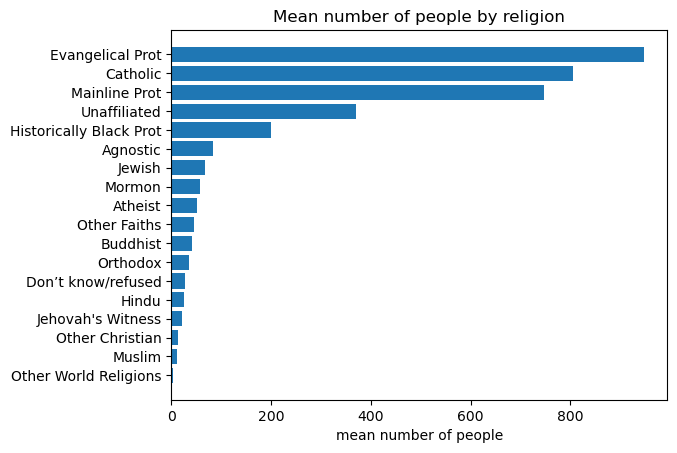

In [384]:
plt.barh(pew_tidy.groupby("religion").frequency.mean().sort_values().index,pew_tidy.groupby("religion").frequency.mean().sort_values())
plt.title("Mean number of people by religion")
plt.xlabel("mean number of people")
plt.show()

In [389]:
aggregates = {"religion": [], 
             "min": [],
             "max": [],
             "mean": []}
for (religion, group_date) in pew_tidy.groupby("religion"):
    print(religion, group_date.frequency.min(), group_date.frequency.mean(), group_date.frequency.max(), sep="; ")
    aggregates['religion'].append(religion)
    aggregates['min'].append(group_date.frequency.min())
    aggregates['mean'].append(group_date.frequency.mean())
    aggregates['max'].append(group_date.frequency.max())

Agnostic; 27; 82.6; 137
Atheist; 12; 51.5; 76
Buddhist; 21; 41.1; 62
Catholic; 418; 805.4; 1489
Don’t know/refused; 10; 27.2; 116
Evangelical Prot; 414; 947.2; 1529
Hindu; 1; 25.7; 54
Historically Black Prot; 78; 199.5; 339
Jehovah's Witness; 6; 21.5; 37
Jewish; 19; 68.2; 162
Mainline Prot; 289; 747.0; 1328
Mormon; 29; 58.1; 112
Muslim; 6; 11.6; 23
Orthodox; 13; 36.3; 73
Other Christian; 7; 12.9; 18
Other Faiths; 20; 44.9; 71
Other World Religions; 2; 4.2; 8
Unaffiliated; 217; 370.7; 597


In [391]:
pd.DataFrame(aggregates)

,religion,min,max,mean
0,Agnostic,27,137,82.6
1,Atheist,12,76,51.5
2,Buddhist,21,62,41.1
3,Catholic,418,1489,805.4
4,Don’t know/refused,10,116,27.2
5,Evangelical Prot,414,1529,947.2
6,Hindu,1,54,25.7
7,Historically Black Prot,78,339,199.5
8,Jehovah's Witness,6,37,21.5
9,Jewish,19,162,68.2


In [396]:
weather_data[~(weather_data.tmin > 15)] 

element,date,tmin,tmax
0,2010-01-30,14.5,27.8
1,2010-02-02,14.4,27.3
2,2010-02-03,14.4,24.1
3,2010-02-11,13.4,29.7
4,2010-02-23,10.7,29.9
5,2010-03-05,14.2,32.1
14,2010-08-23,15.0,26.4
21,2010-10-05,14.0,27.0
22,2010-10-14,13.0,29.5
23,2010-10-07,12.9,28.1


## Cleaning Data

In [430]:
us_weather_data = pd.read_csv('https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv')

In [431]:
#check shape
us_weather_data.shape

(366, 23)

In [432]:
#check types of columnns 
us_weather_data.dtypes
# notice that some names have space as prefix 
# some separators are ',' others are ", "

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [433]:
# rename a columns names where there is a space in names
us_weather_data = us_weather_data.rename(columns = lambda x: x.strip())

In [434]:
us_weather_data.dtypes

EDT                           object
Max TemperatureF               int64
Mean TemperatureF              int64
Min TemperatureF               int64
Max Dew PointF                 int64
MeanDew PointF                 int64
Min DewpointF                  int64
Max Humidity                   int64
Mean Humidity                  int64
Min Humidity                   int64
Max Sea Level PressureIn     float64
Mean Sea Level PressureIn    float64
Min Sea Level PressureIn     float64
Max VisibilityMiles            int64
Mean VisibilityMiles           int64
Min VisibilityMiles            int64
Max Wind SpeedMPH              int64
Mean Wind SpeedMPH             int64
Max Gust SpeedMPH            float64
PrecipitationIn               object
CloudCover                     int64
Events                        object
WindDirDegrees                 int64
dtype: object

In [435]:
# basic rename
us_weather_data.columns = [
    "date", "max_temp", "mean_temp", "min_temp", "max_dew",
    "mean_dew", "min_dew", "max_humidity", "mean_humidity",
    "min_humidity", "max_pressure", "mean_pressure",
    "min_pressure", "max_visibility", "mean_visibility",
    "min_visibility", "max_wind", "mean_wind", "max_gusts",
    "precipitation", "cloud_cover", "events", "wind_dir"
    ]

In [436]:
us_weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,366.0,66.803279,20.361247,16.00,51.00,69.00,84.0000,106.00
mean_temp,366.0,55.683060,18.436506,11.00,41.00,59.00,70.7500,89.00
min_temp,366.0,44.101093,17.301141,1.00,30.00,47.00,57.7500,77.00
max_dew,366.0,49.549180,16.397178,0.00,36.00,54.50,62.0000,77.00
mean_dew,366.0,44.057377,16.829996,-3.00,30.00,48.00,57.0000,72.00
min_dew,366.0,37.980874,17.479449,-5.00,24.00,41.00,51.0000,71.00
max_humidity,366.0,90.027322,9.108438,54.00,85.00,93.00,96.0000,100.00
mean_humidity,366.0,67.860656,9.945591,37.00,61.25,68.00,74.0000,95.00
min_humidity,366.0,45.193989,15.360261,15.00,35.00,42.00,54.0000,90.00
max_pressure,366.0,30.108907,0.172189,29.64,29.99,30.10,30.2100,30.60


In [437]:
# dtypes shows us that precipitation is object, that means there is some string as value. We need to fix it. 
# check values in this column
us_weather_data.precipitation.unique()
# and  we see that there is 'T' (trace value - very small value)

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [438]:
# we change trace values with very small number 
us_weather_data.loc[us_weather_data.precipitation == "T" , "precipitation"] = 1e-15

In [439]:
# convert precipitation as float
us_weather_data.precipitation = us_weather_data.precipitation.astype(float)

In [443]:
# convery date column to datetime type
us_weather_data.date = pd.to_datetime(us_weather_data.date)

In [448]:
# set date as index 
us_weather_data = us_weather_data.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [449]:
us_weather_data.loc["2013/03/06"]

max_temp              32
mean_temp             31
min_temp              29
max_dew               27
mean_dew              26
min_dew               25
max_humidity          92
mean_humidity         85
min_humidity          78
max_pressure       30.31
mean_pressure      30.03
min_pressure       29.78
max_visibility        10
mean_visibility        5
min_visibility         1
max_wind              22
mean_wind              9
max_gusts           33.0
precipitation       0.04
cloud_cover            8
events              Snow
wind_dir             314
Name: 2013-03-06 00:00:00, dtype: object

In [450]:
us_weather_data[us_weather_data.max_temp > 80]

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-03-19,84,72,59,58,56,50,90,66,42,30.09,...,10,10,10,17,6,23.0,0.00,1,NaN,165
2012-03-20,84,71,58,56,54,50,78,58,37,30.09,...,10,10,10,17,5,24.0,0.00,0,NaN,154
2012-03-21,84,71,57,56,54,52,84,58,32,30.14,...,10,10,10,17,6,23.0,0.00,1,NaN,152
2012-03-22,81,69,57,63,57,51,87,65,42,30.11,...,10,10,2,31,4,41.0,0.14,3,Rain,159
2012-03-30,81,66,51,61,50,42,78,59,39,29.93,...,10,10,10,25,11,37.0,0.01,4,Rain-Thunderstorm,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-05,85,74,63,72,67,64,100,83,65,29.94,...,10,6,0,17,3,26.0,0.92,3,Fog-Rain-Thunderstorm,236
2012-09-06,86,74,62,70,67,62,100,81,61,29.98,...,10,5,0,10,2,14.0,0.00,2,Fog,220
2012-09-07,89,77,65,70,67,64,100,73,46,29.93,...,10,4,0,23,5,33.0,1.10,3,Fog-Rain-Thunderstorm,197


In [451]:
#take columns where "temp" is in there names
us_weather_data.columns[us_weather_data.columns.str.contains('temp')]

Index(['max_temp', 'mean_temp', 'min_temp'], dtype='object')

In [455]:
us_weather_data[
us_weather_data.columns[
    (us_weather_data.columns.str.contains('temp')) | 
    (us_weather_data.columns.str.contains('dew'))
]]


,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew
date,,,,,,
2012-03-10,56,40,24,24,20,16
2012-03-11,67,49,30,43,31,24
2012-03-12,71,62,53,59,55,43
2012-03-13,76,63,50,57,53,47
2012-03-14,80,62,44,58,52,43
...,...,...,...,...,...,...
2013-03-06,32,31,29,27,26,25
2013-03-07,36,32,28,27,25,22
2013-03-08,47,35,23,27,24,21


In [459]:
us_weather_data.events.count()

162

In [460]:
us_weather_data.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [463]:
us_weather_data.cloud_cover.unique()

array([0, 1, 6, 3, 2, 7, 5, 4, 8])

In [472]:
# some grouping
for (cloud_cover, events), group_data in us_weather_data.groupby(["cloud_cover", "events"]):
    print(cloud_cover, events, len(group_data))

0 Fog 2
0 Rain 2
0 Thunderstorm 1
1 Fog 5
1 Fog-Rain 1
1 Rain 4
1 Rain-Thunderstorm 2
1 Thunderstorm 6
2 Fog 1
2 Rain 5
2 Rain-Thunderstorm 4
2 Snow 1
2 Thunderstorm 2
3 Fog 2
3 Fog-Rain-Thunderstorm 3
3 Fog-Thunderstorm 1
3 Rain 9
3 Rain-Thunderstorm 4
3 Snow 1
4 Fog 3
4 Fog-Rain 2
4 Fog-Rain-Thunderstorm 2
4 Rain 10
4 Rain-Thunderstorm 6
4 Snow 1
5 Fog-Rain 1
5 Fog-Rain-Snow 1
5 Rain 13
5 Rain-Thunderstorm 3
5 Snow 2
6 Fog-Rain 2
6 Fog-Rain-Snow 1
6 Fog-Rain-Thunderstorm 2
6 Rain 9
6 Rain-Thunderstorm 4
6 Snow 1
7 Fog-Rain 1
7 Fog-Rain-Thunderstorm 1
7 Fog-Snow 3
7 Rain 6
7 Rain-Thunderstorm 3
7 Snow 1
8 Fog-Rain 4
8 Fog-Rain-Snow 1
8 Fog-Rain-Snow-Thunderstorm 1
8 Fog-Snow 2
8 Rain 11
8 Rain-Snow 3
8 Snow 6
